# CSI 4142 Project Phase 3
## Data Mining
### Group 1 Member
| Name | Student ID |
|-------|---------------|
| Gary Gao | 300124236|
| Yingqi Feng | 300077437|
| Binxuan Wu | 300142301 | 

In [ ]:
!pip install Lets-Plot -U
import numpy as np
from lets_plot import *
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.read_csv( "https://raw.githubusercontent.com/BinxuanWu/CSI4142-Project/main/Stagged_data.csv", encoding = 'unicode_escape', dtype={2:str})
df = df.drop(['Unnamed: 0'], axis=1)
df_building =  pd.read_csv("https://raw.githubusercontent.com/BinxuanWu/CSI4142-Project/main/domain%20graphs/building.csv", encoding = 'unicode_escape', dtype={0:str})
df_community =  pd.read_csv("https://raw.githubusercontent.com/BinxuanWu/CSI4142-Project/main/domain%20graphs/community.csv", encoding = 'unicode_escape')
df_date =  pd.read_csv("https://raw.githubusercontent.com/BinxuanWu/CSI4142-Project/main/domain%20graphs/date.csv", encoding = 'unicode_escape')
df_house =  pd.read_csv("https://raw.githubusercontent.com/BinxuanWu/CSI4142-Project/main/domain%20graphs/housing_price.csv", encoding = 'unicode_escape')
df_ori =  pd.read_csv( "https://raw.githubusercontent.com/BinxuanWu/CSI4142-Project/main/Beijing.csv", encoding = 'gb2312')

<ipython-input-52-b6317214d64b>:7: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ori =  pd.read_csv( "https://raw.githubusercontent.com/BinxuanWu/CSI4142-Project/main/Beijing.csv", encoding = 'gb2312')


# Part A. Data summarization, data preprocessing and feature selections


## Exploring and Summarizing Data

**Histogram to see how is the data distributed in each column**

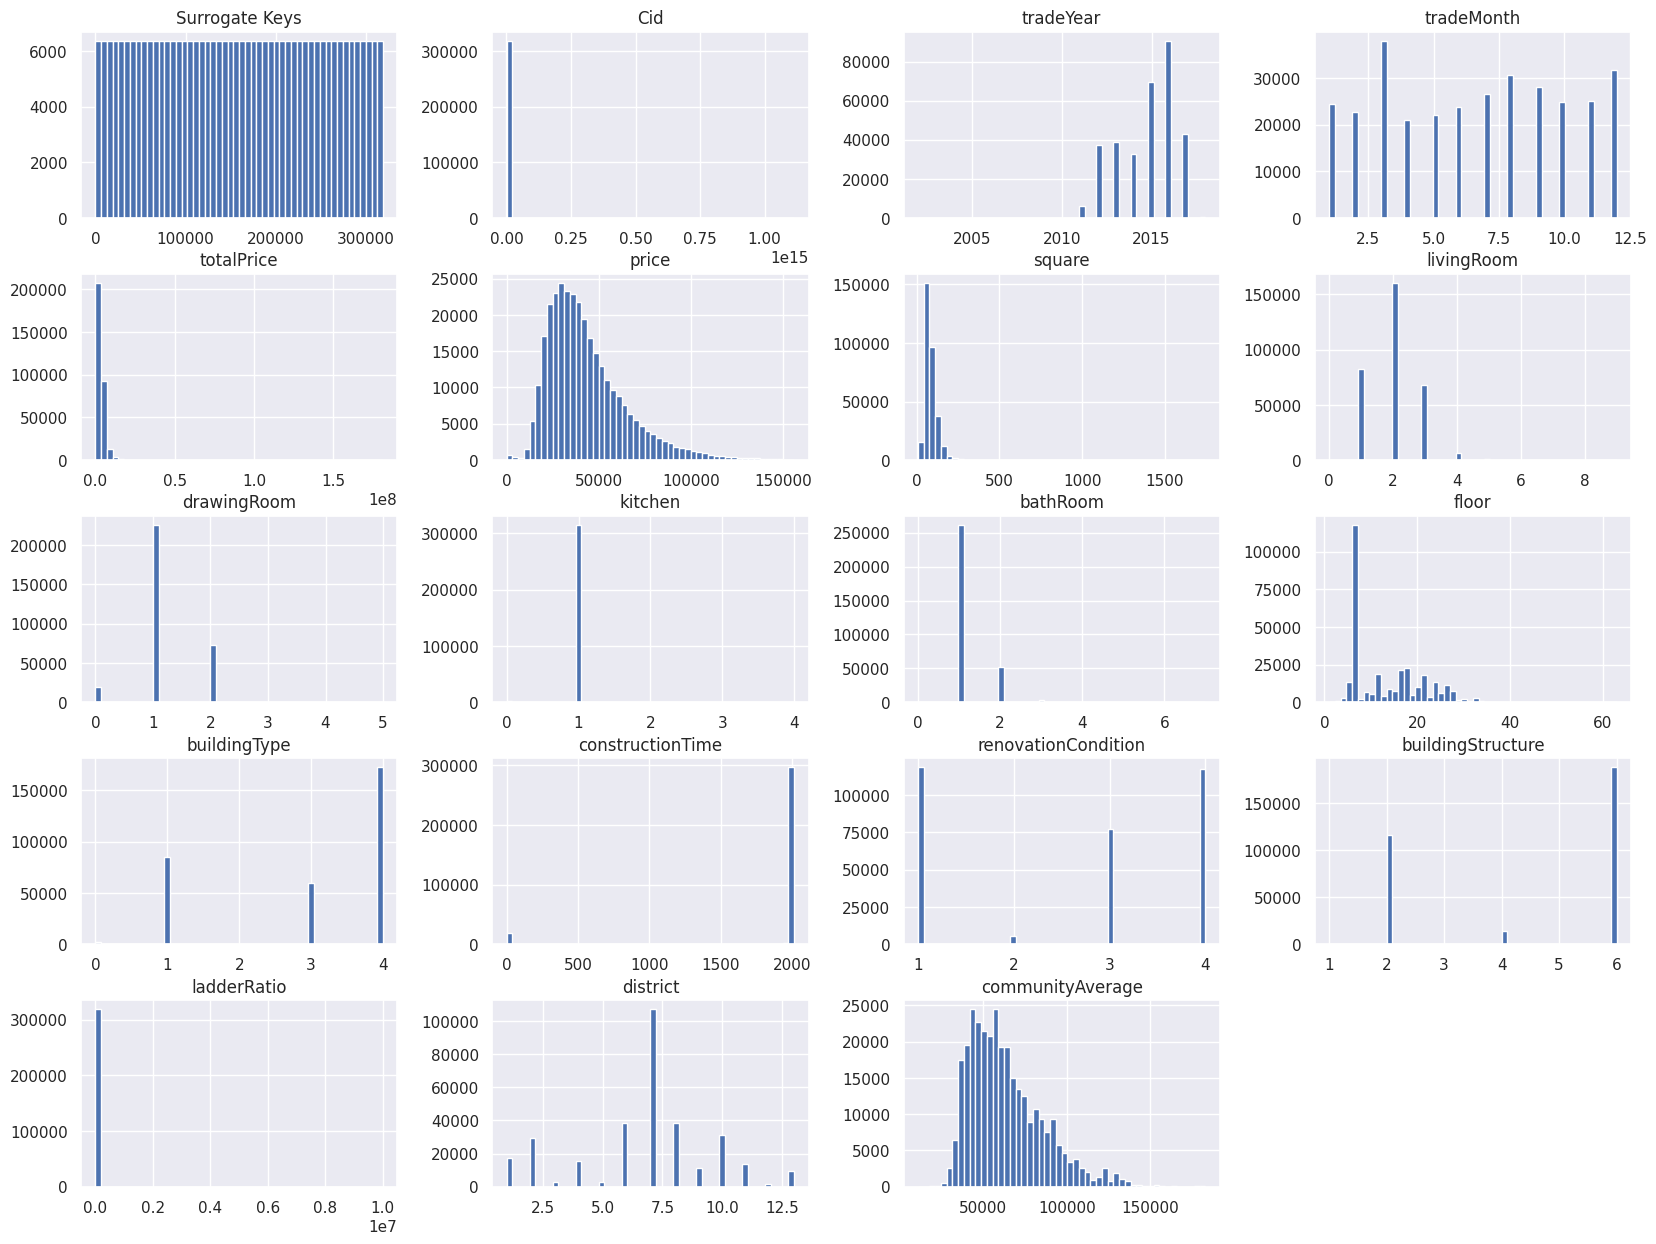

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

**Heated map to see the corelation between each columns**

<ipython-input-54-6913617a6258>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_building.corr(), annot=True, square=True , fmt = ".3f")


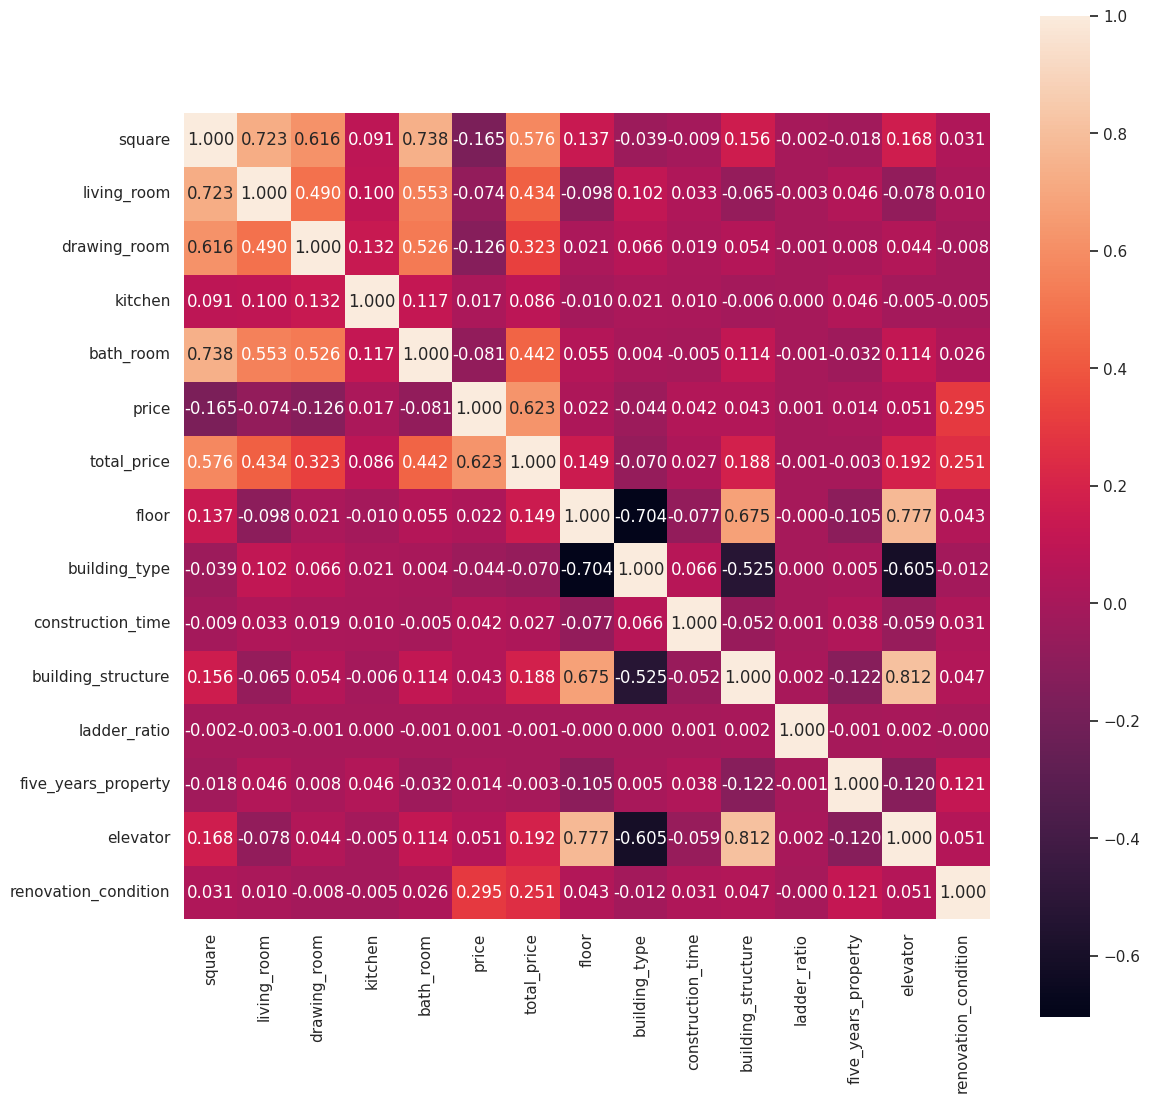

In [ ]:
f,ax = plt.subplots(figsize=(13, 13))
sns.heatmap(df_building.corr(), annot=True, square=True , fmt = ".3f")
plt.show()

From the heated map avobe, we trying to see which columns have strong relationship with price. So that we can do the feature engineering and the training for prediction.

**Showing the price of house in each year**

In [ ]:
listings = df[['tradeTime', 'price']]
listings.isnull().sum()
# Replace 'tradeTime' with just 'year' (Integer).
listings['year'] = pd.DatetimeIndex(listings['tradeTime']).year
listings.drop(['tradeTime'], axis=1, inplace=True)
# The price dynamics over the years.

# According to the dataset description, the 'price' column contains avg. price per square.
(ggplot(listings) + 
 geom_point(aes(x='year', y='price'), position='jitter') + 
 geom_smooth(aes(x='year', y='price'), method='lm', deg=2, size=3) +
 scale_x_continuous(format=".0d"))

<ipython-input-55-e580b6b370c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings['year'] = pd.DatetimeIndex(listings['tradeTime']).year
<ipython-input-55-e580b6b370c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings.drop(['tradeTime'], axis=1, inplace=True)


### Correlation between district and price

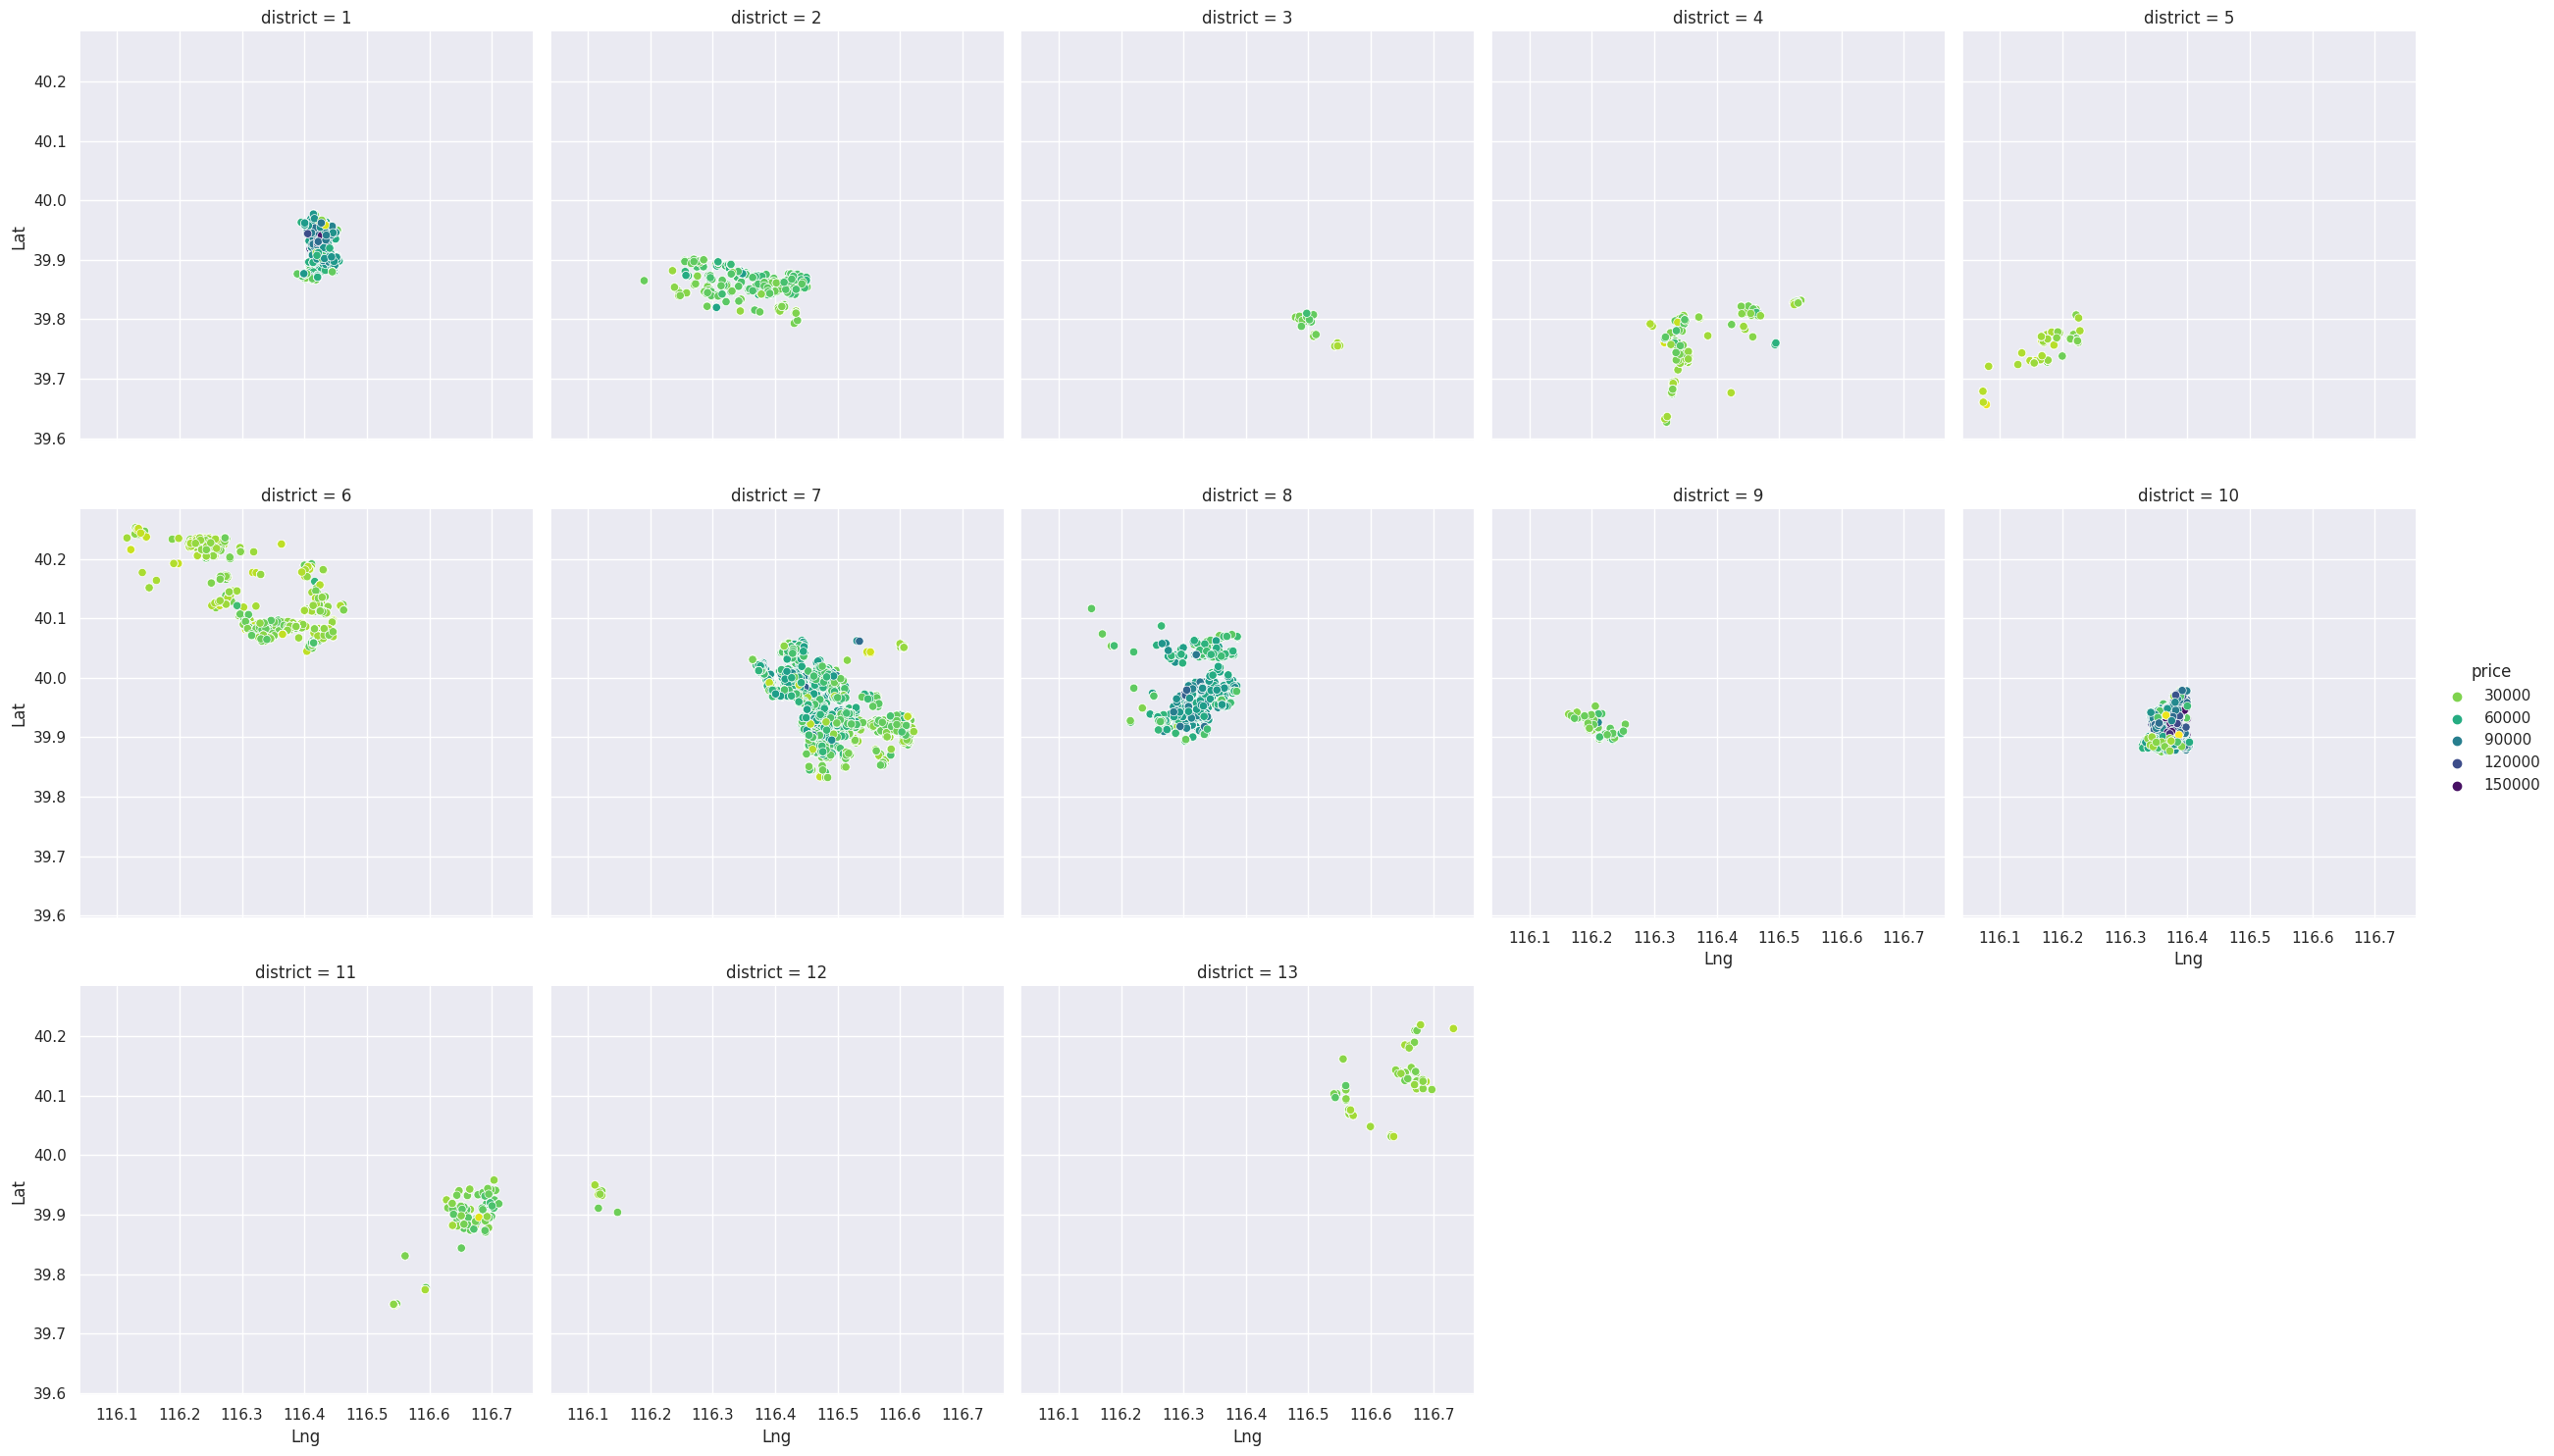

In [ ]:
sns.relplot(kind='scatter', x="Lng", y="Lat", hue="price", col='district', palette='viridis_r', col_wrap=5, data=df_ori)

[Text(0.5, 0, 'Districts'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Correlation between District and Price')]

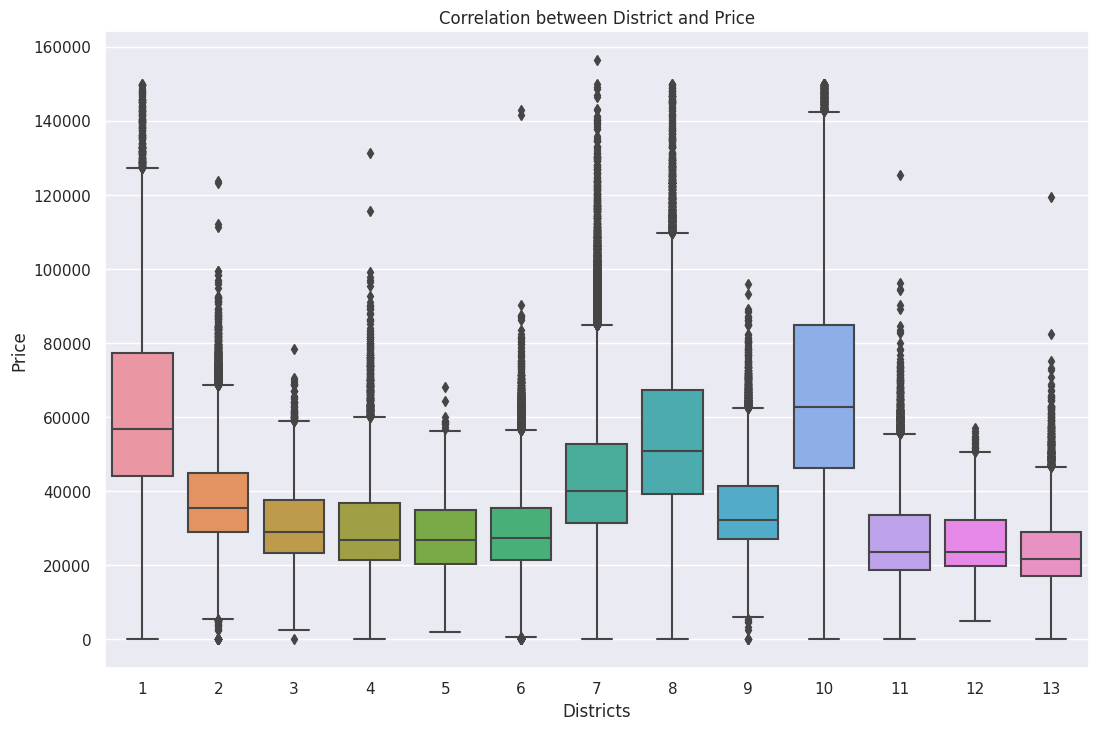

In [ ]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
ax = sns.boxplot(data=df, x="district", y="price")
ax.set(xlabel="Districts", ylabel = "Price",title = "Correlation between District and Price")

From the two figure above, we can see that the most expensive houses centralizes close to the center of Beijing, while the cheapest ones spread in the suburban periphery

## Data Processing

### Feature Selection

In [ ]:
df = df.drop('id', axis=1)
df = df.drop('Cid', axis=1)
df = df.drop('totalPrice', axis=1)
df = df.drop('Surrogate Keys', axis=1)
print(df.columns)


Index(['tradeTime', 'tradeYear', 'tradeMonth', 'price', 'square', 'livingRoom',
       'drawingRoom', 'kitchen', 'bathRoom', 'floor', 'floorLevel',
       'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
       'subway', 'district', 'communityAverage'],
      dtype='object')


In [ ]:
df['price'].head()
df.loc[df['price'] <= 30000, 'priceRange'] = '0_To_30K'
df.loc[(df['price'] > 30000)&(df['price'] <= 60000), 'priceRange'] = '30k_To_60k'
df.loc[(df['price'] > 60000)&(df['price'] <= 90000), 'priceRange'] = '60k_To_90k'
df.loc[(df['price'] > 90000)&(df['price'] <= 120000), 'priceRange'] = '90k_To_120k'
df.loc[(df['price'] > 120000)&(df['price'] <= 150000), 'priceRange'] = '120k_To_150k'
df.loc[(df['price'] > 150000), 'priceRange'] = '150k_and_above'
df = df.drop('price', axis=1)
df = df.drop('tradeTime', axis = 1)
print(df.columns)

Index(['tradeYear', 'tradeMonth', 'square', 'livingRoom', 'drawingRoom',
       'kitchen', 'bathRoom', 'floor', 'floorLevel', 'buildingType',
       'constructionTime', 'renovationCondition', 'buildingStructure',
       'ladderRatio', 'elevator', 'fiveYearsProperty', 'subway', 'district',
       'communityAverage', 'priceRange'],
      dtype='object')


### One-hot encoding

convert all categorical variables into dummy variables

In [ ]:
data = df.copy()
data = pd.get_dummies(data , columns = ['tradeYear','tradeMonth','floorLevel', 'buildingType', 'renovationCondition', 'buildingStructure' , 'fiveYearsProperty','elevator','subway','district'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318819 entries, 0 to 318818
Data columns (total 75 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   square                 318819 non-null  float64
 1   livingRoom             318819 non-null  float64
 2   drawingRoom            318819 non-null  float64
 3   kitchen                318819 non-null  float64
 4   bathRoom               318819 non-null  float64
 5   floor                  318819 non-null  int64  
 6   constructionTime       318819 non-null  int64  
 7   ladderRatio            318819 non-null  float64
 8   communityAverage       318819 non-null  float64
 9   priceRange             318819 non-null  object 
 10  tradeYear_2002         318819 non-null  uint8  
 11  tradeYear_2003         318819 non-null  uint8  
 12  tradeYear_2008         318819 non-null  uint8  
 13  tradeYear_2009         318819 non-null  uint8  
 14  tradeYear_2010         318819 non-nu

### Normalization columns

In [ ]:
col_to_norm = ['square', 'livingRoom','drawingRoom','kitchen','bathRoom',  'floor', 'ladderRatio','communityAverage']
scaler = MinMaxScaler()
data[col_to_norm] = scaler.fit_transform(data[col_to_norm])
data.head()

,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,constructionTime,ladderRatio,communityAverage,priceRange,...,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13
0,0.071379,0.222222,0.2,0.25,0.142857,0.403226,2005,2.028094e-08,0.262240,30k_To_60k,...,0,0,0,1,0,0,0,0,0,0
1,0.072173,0.222222,0.4,0.25,0.285714,0.338710,2004,6.523868e-08,0.352324,30k_To_60k,...,0,0,0,1,0,0,0,0,0,0
2,0.109916,0.333333,0.4,0.25,0.428571,0.048387,2005,4.855436e-08,0.216606,30k_To_60k,...,0,0,0,1,0,0,0,0,0,0
3,0.073105,0.333333,0.2,0.25,0.142857,0.322581,2008,2.587568e-08,0.234474,0_To_30K,...,0,0,1,0,0,0,0,0,0,0
4,0.042620,0.222222,0.2,0.25,0.142857,0.080645,1960,3.187004e-08,0.300362,30k_To_60k,...,0,0,0,0,0,0,0,0,0,0


# Part B. Classification (Supervised Learning)

## Separate the train and test data

In [ ]:
x = data.drop('priceRange', axis=1)
y = data['priceRange']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=15)

## Training at different models

### Decision Tree

In [ ]:
modelDT = DecisionTreeClassifier(random_state=42)
st_timeDT = time.time()
modelDT.fit(X_train, y_train)
end_timeDT = time.time()
timeDT = end_timeDT - st_timeDT

### Gradient Boosting

In [ ]:
modelGB = GradientBoostingClassifier(random_state=42)
st_timeGB = time.time()
modelGB.fit(X_train, y_train)
end_timeGB = time.time()
timeGB = end_timeGB - st_timeGB

### Random Froest 

In [ ]:
modelRF = RandomForestClassifier(random_state=42)
st_timeRF = time.time()
modelRF.fit(X_train, y_train)
end_timeRF = time.time()
timeRF = end_timeRF - st_timeRF

## Evaluation of models

In [ ]:
def model_performance(model, X_test, y_test):
    # predict the classes of test set
    y_pred = model.predict(X_test)
    
    # calculate accuracy, precision, and recall
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall

models = [modelDT, modelGB, modelRF]
names = []
test_accuracy = []
test_precision = []
test_recall = []
test_time = [timeDT, timeGB, timeRF]

for model in models:
    acc, prec, recall = model_performance(model, X_test, y_test)
    #------------------------------------------------
    test_accuracy.append(acc)
    test_precision.append(prec)
    test_recall.append(recall)

    # cm = classification_report(y_test, y_pred)
    names.append(model.__class__.__name__)
    # print(model.__class__.__name__)
    # print(cm, '\n')

print("Initial Results")
res = pd.DataFrame(index = range(len(models)))
res.insert(0, 'Model', pd.Series(names))
res['Accuracy'] = test_accuracy
res['Precision'] = test_precision
res['Recall'] = test_recall
res['Time'] = test_time
res

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Initial Results


,Model,Accuracy,Precision,Recall,Time
0,DecisionTreeClassifier,0.846402,0.846577,0.846402,7.105995
1,GradientBoostingClassifier,0.850605,0.849783,0.850605,509.491443
2,RandomForestClassifier,0.879274,0.878462,0.879274,74.212406
